In [1]:
import xarray as xr
import numpy as np


In [4]:
!ln -s /Users/luhan/Downloads/mhw_data "/Users/luhan/Documents/OneDrive - University of North Carolina at Chapel Hill/2021/marine_heat_wave_prediction/"

In [7]:
!tar xf mhw_data/marine_heatwave_train_v2.tar.gz -C mhw_data/

In [2]:
oa = xr.open_dataset("mhw_data/oaflux_air_sea_fluxes_train.nc")
oa

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, time: 412)
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2015-12-01
Data variables:
    evapr    (time, lat, lon) float32 ...
    lhtfl    (time, lat, lon) float32 ...
    nlwrs    (time, lat, lon) float32 ...
    hum2m    (time, lat, lon) float32 ...
    qnet     (time, lat, lon) float32 ...
    shtfl    (time, lat, lon) float32 ...
    nswrs    (time, lat, lon) float32 ...
    tmp2m    (time, lat, lon) float32 ...
    tmpsf    (time, lat, lon) float32 ...
    wnd10    (time, lat, lon) float32 ...

In [5]:
train = xr.open_dataset("mhw_data/marine_heatwave_labels_train.nc")
train

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180, time: 412)
Coordinates:
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time       (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2015-12-01
Data variables:
    lsmask     (lat, lon) float32 ...
    mhw_label  (time, lat, lon) float32 ...

Due to the ice covering issue, the polar regions have some data loss during the winter time.

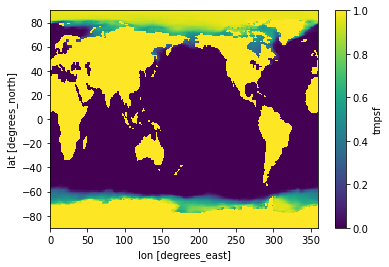

In [6]:
xr.ufuncs.isnan(oa.tmpsf).mean(dim='time').plot()

The xarray function "corr" and "shift" can be very handy when we explore the correlation between different parameters and the mhw_labels.
Due to data loss at the polar regions, the auto-correlation returns nan at those places.

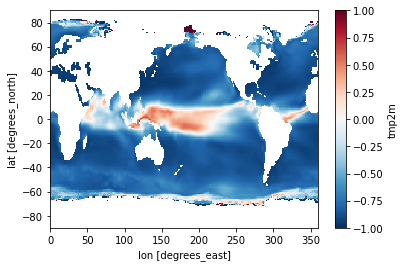

In [7]:
corr = xr.corr(oa.tmp2m,oa.tmp2m.shift(shifts={'time':6}),dim="time")
corr.plot()

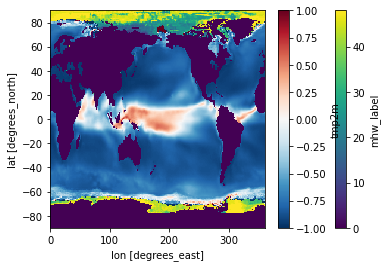

In [8]:
(train.mhw_label==1).sum(dim='time').plot()
corr.plot()

We can use the stack function to decrease the dimensionality of the data if necessary.  

In [9]:
train.lsmask.stack(point=["lat","lon"])

<xarray.DataArray 'lsmask' (point: 64800)>
array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)
Coordinates:
  * point    (point) MultiIndex
  - lat      (point) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
  - lon      (point) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    units:      1: Ocean, 0: Land
    long_name:  Land-sea mask